# Neural Network from Scratch 

* The goal of this notebook is to visualize the experimentations, and how I went through this project. 

Step 1 : Load, visualize, preprocess

In [1]:
#Import the packages np for array manipulation and matplotlib for the visualisations. We also import sklearn just to load the dataset. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# Import the data and their associated target with sklearn

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype(int)



In [3]:
# Splitting the data into train/test set 

X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]


print(f"Train images : {X_train.shape[0]}")
print(f"Test images : {X_test.shape[0]}")

Train images : 60000
Test images : 10000


As we load the mnist_784, images are already "flatten" as 1 dimensionnal array, a vector : (784,)
To visualize an image of the dataset we have to reshape it to a 2 dimensionnal array, a matrix : (28,28)

In [4]:
test_image = X_test[0]
print(f"Initial shape of a sample : {test_image.shape}")

reshape_test_image = test_image.reshape(28,28)
print(f"After reshaping : {reshape_test_image.shape}")

Initial shape of a sample : (784,)
After reshaping : (28, 28)


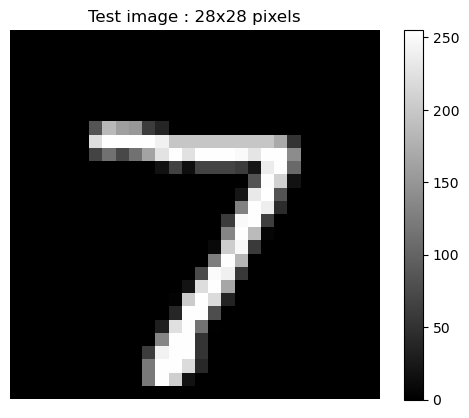

In [5]:
# Visualizing a test image 

plt.imshow(reshape_test_image, cmap = 'gray')
plt.title("Test image : 28x28 pixels")
plt.colorbar()
plt.axis('off')

plt.show()

In [6]:
#As we saw with the vizualisation, pixels have values, between 0, and 255 so we normalize them between zeros and ones 

X_train, X_test = X_train/255, X_test/255

We want to classify our images, as we got 10 differents numbers possible, it is a multi classification case. We will then use the softmax activations functions for our ouput layer, giving us the probability of each class. 
We need to one hot encode our y_train. 

In [41]:
onehot_y_train = np.zeros([60000,10])
onehot_y_train[np.arange(60000),y_train] =  1 

print(f"Y_train sample before one hot encoding : {y_train[0]}")
print(f"Y_train sample after one hot encoding : {onehot_y_train[0]}")


Y_train sample before one hot encoding : 5
Y_train sample after one hot encoding : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Now, the output of the neural network has the same shape as the one-hot encoded y_train, which allows direct computation of the loss.

# Implementation of the forward propagation

In [ ]:
# We randomly initalize the weights and biases with a 10 neurons hidden layer by default

def init_params(hidden_layer = 10): 
    W1 = np.random.rand(hidden_layer,784)
    W2 = np.random.rand(10,hidden_layer)
    b1 = np.random.rand(hidden_layer,1)
    b2 = np.random.rand(10,1)
    return W1,W2,b1,b2

W1, W2, b1, b2 = init_params()



In [ ]:
# Implement the ReLU activation function 

def ReLU(x):
    return np.maximum(x,0)

In [ ]:
# Implement the softmax function 

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)


In [ ]:
# Implementing the forward propagation, z means the pre activation of a layer and a the ouput of the layer after activation. 

def feed_forward(W1, W2, b1, b2, X):
    z1 = np.matmul(W1,X.T) + b1
    a1 = ReLU(z1)
    z2 = np.matmul(W2,a1) + b2
    a2 = Softmax(z2)
    return a2

a2 = feed_forward(W1, W2, b1, b2, X_train)

print(f"Shape of the output : {a2.shape}")

Shape of the ouput : (10, 60000)


/tmp/ipykernel_70894/662876171.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/np.sum(np.exp(x), axis = 0)
/tmp/ipykernel_70894/662876171.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(x)/np.sum(np.exp(x), axis = 0)


We check the accuracy of the model without training (backpropagation).
Since the weights and biases are randomly initialized and never updated, the model has not minimized any loss function, which results in a very poor accuracy.

In [38]:
def get_accuracy(output, matrix):

    pred_indices = np.argmax(output.T, axis=1)  
    true_indices = np.argmax(matrix, axis=1)    
    
    matches = (pred_indices == true_indices)

    accuracy = np.mean(matches)
    
    return accuracy

print(f"Accuracy of the model without backpropagation : {(get_accuracy(a2, onehot_y_train)*100):.2f}%")

Accuracy of the model without backpropagation : 9.65%
